# 軟性邊界支撐向量機(Soft-Margin Support Vector Machine)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

##### 設定我們有60個點，其中30個是圈圈，30個是叉叉

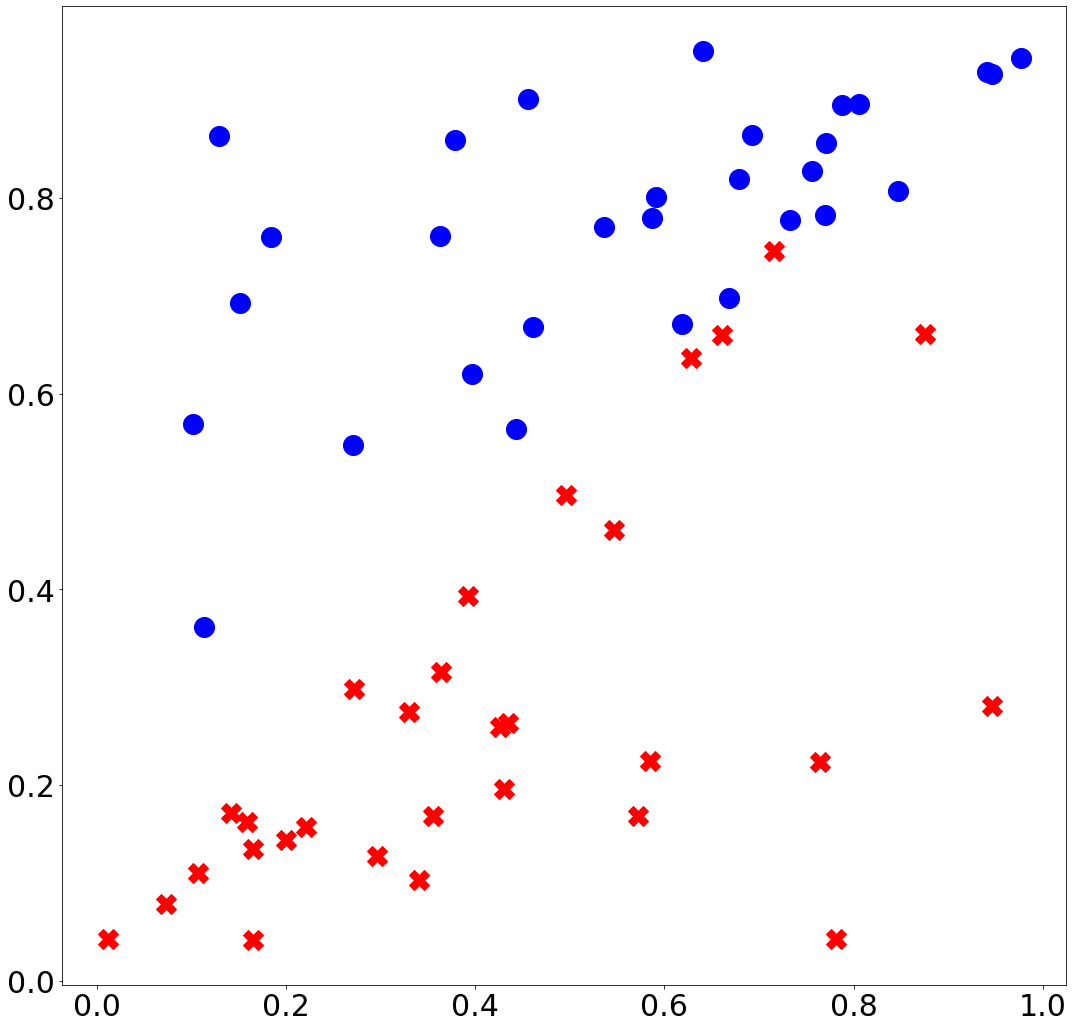

In [7]:
# 這裡我們建立一個60*2的矩陣x
# 60代表我們有60個點，2代表為2維空間(平面)
x=np.zeros((60,2))
# 這裡我們建立一個長度60的向量y
# 用來儲存我們的標記資料是圈圈(+1)還是叉叉(-1)
y=np.zeros(60)
# 因為有60筆資料，所以跑60個迴圈
for i in range(0,60): 
    # 標記y前半段0~29為圈圈(+1)，後半段30~59為叉叉(-1)
    # 也就是圈圈30個點，叉叉30個點
    f=-0.04
    if(i<30):
        y[i]=1
        x[i,0]=random.random()
        x[i,1]=random.uniform(x[i,0],1)+f
    else:
        y[i]=-1
        x[i,0]=random.random()
        x[i,1]=random.uniform(0,x[i,0])-f
    # 這裡我們隨機給定我們資料的位置
    # 而f可以決定我們圈圈和叉叉兩組數據分的越開或是越近
    
# 設定我們輸出圖片的大小
plt.rcParams["figure.figsize"] = (18,18)
#畫出圈圈的點，bo：b代表藍色、o代表圈圈、marksize為大小
plt.plot(x[:30,0],x[:30,1],"bo",markersize=20)
#畫出叉叉的點，rX：r代表紅色、X代表叉叉、marksize為大小
plt.plot(x[30:,0],x[30:,1],"rX",markersize=20)
# 設定x和y軸座標的字體大小
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#畫出來
plt.show()

# 演算法

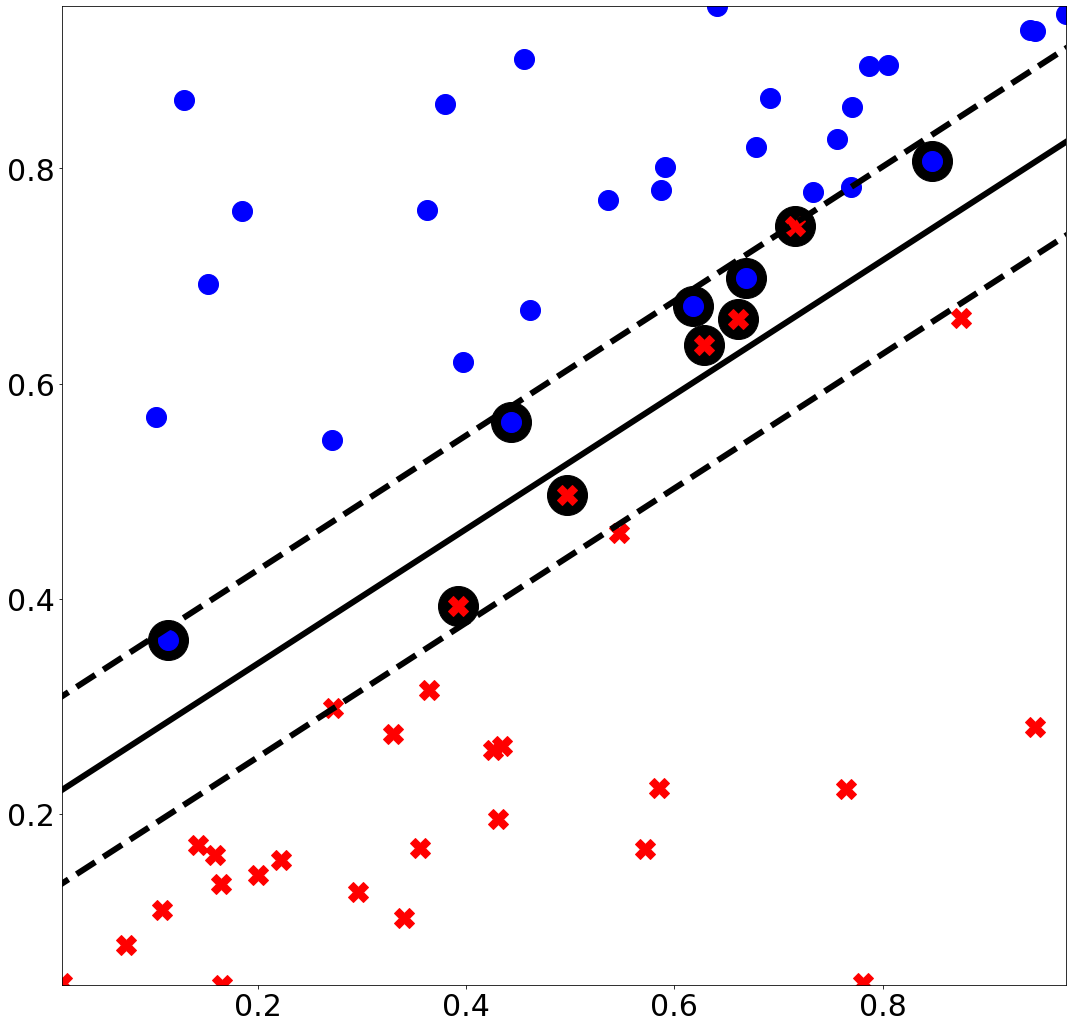

In [8]:
# M: feature數量
# N: data數量
# C: 公式中的參數C
M=2
N=60
C=50
# 這裡可以對照公式
QQ=np.zeros((M+1+N,M+1+N))
QQ[1:M+1,1:M+1]=np.diag(np.ones(M))
pp=np.concatenate([np.zeros(M+1),np.ones(N)*C])
xy=np.zeros((N,M+1))
xy[:,0]=y
for i in range(1,3):
    xy[:,i]=y*x[:,i-1]
GG=np.zeros((2*N,N+M+1))
GG[:N,:M+1]=xy
GG[:N,M+1:]=np.diag(np.ones(N))
GG[N:,M+1:]=np.diag(np.ones(N))
hh=np.concatenate([np.ones(N),np.zeros(N)])
Q = cvxopt.matrix(QQ)
p = cvxopt.matrix(pp)
G = cvxopt.matrix(-GG)
h = cvxopt.matrix(-hh)

# 利用cvxopt套件求解
cvxopt.solvers.options['show_progress'] = False
result = np.array(cvxopt.solvers.qp(Q, p, G, h)['x']).flatten()
zeta=result[M+1:]
w=result[:M+1]


# 繪圖
plt.rcParams["figure.figsize"] = (18,18)
temp=100
for i in range(0,N):
    # 畫出分類錯誤的點
    if(y[i]*(x[i,:].dot(w[1:])+w[0])<1):
        plt.plot(x[i,0],x[i,1],"ko",markersize=40)
    # 標記邊界
    else:
        if(temp>y[i]*(x[i,:].dot(w[1:])+w[0])):
            temp=y[i]*(x[i,:].dot(w[1:])+w[0])
            index=i
# 畫出所有的數據點
plt.plot(x[:30,0],x[:30,1],"bo",markersize=20)
plt.plot(x[30:,0],x[30:,1],"rX",markersize=20)

# 計算截距和斜率
m=-w[1]/w[2]
b=-w[0]/w[2]
b_delta=abs(x[index,1]-m*x[index,0]-b)
# 匯出margin line和分割線
plt.plot([0,1],[b,m+b],"k-",linewidth=6)
plt.plot([0,1],[b+b_delta,m+b+b_delta],"k--",linewidth=6)
plt.plot([0,1],[b-b_delta,m+b-b_delta],"k--",linewidth=6)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

x1_lowest=min(x[:,0])
x1_highest=max(x[:,0])
x2_lowest=min(x[:,1])
x2_highest=max(x[:,1])
plt.xlim([x1_lowest,x1_highest])
plt.ylim([x2_lowest,x2_highest])
plt.show()
